<a href="https://colab.research.google.com/github/WagnerFLL/Diabetic-Retinopathy/blob/master/DR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Set gdrive as root { display-mode: "form" }
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from IPython.display import Image
from keras.models import load_model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

path = 'gdrive/My Drive/DR/'
path2 = 'gdrive/My Drive/Capstone/images/eda/'

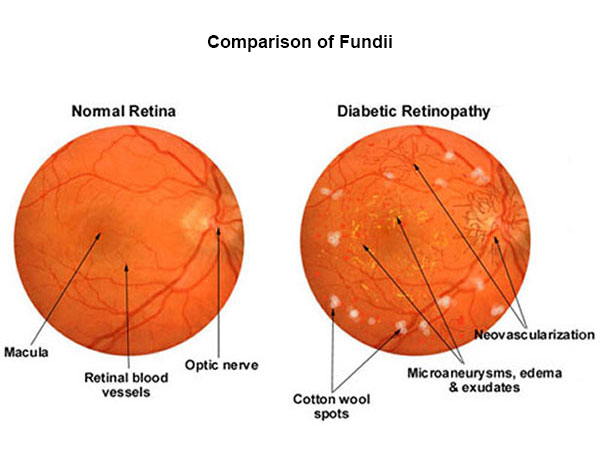

In [0]:
#@title Comparision { display-mode: "form" }
Image(retina=True, filename=path+'fundus-3.jpg')

## Dataset (Kaggle)

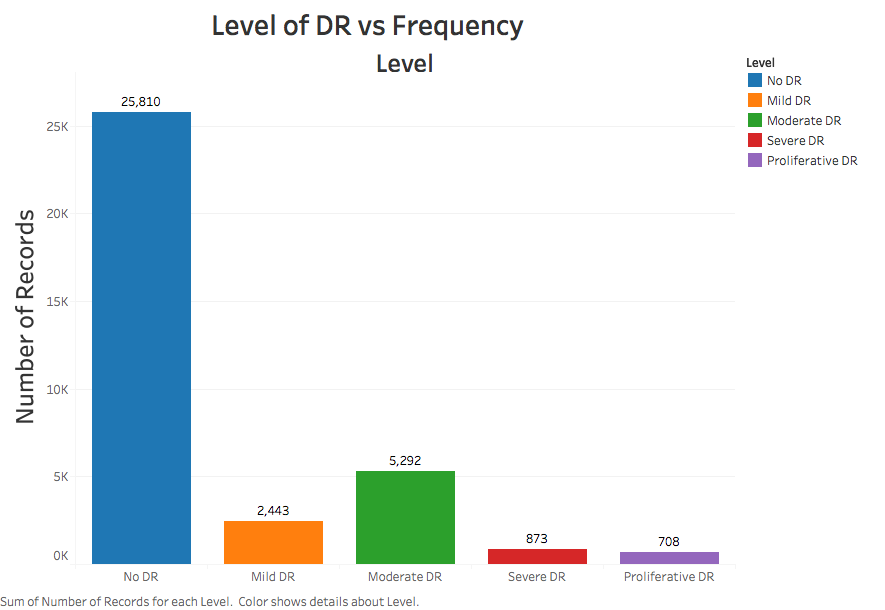

In [0]:
#@title Frequency { display-mode: "form" }
Image(retina=True, filename=path+'DR_vs_Frequency_tableau.png')

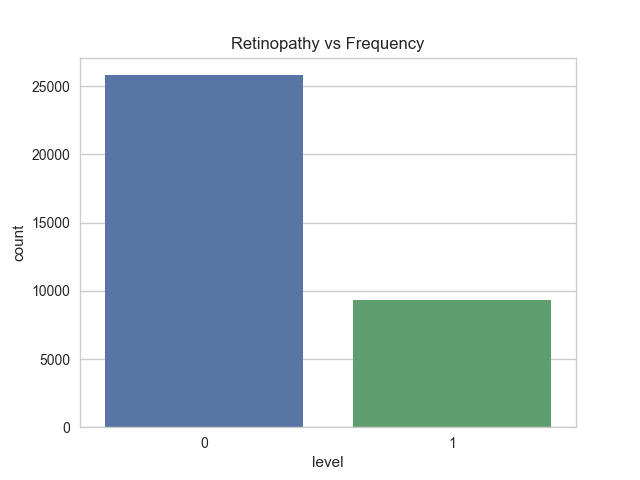

In [22]:
#@title Binary { display-mode: "form" }
Image(retina=True, filename=path2+'Retinopathy_vs_Frequency_Binary.png')

## Augmentation
N-DR:
* Mirror Non-DR Images

DR:
* Rotating 90 Degrees
* Rotating 120 Degrees
* Rotating 180 Degrees
* Rotating 270 Degrees
* Mirror DR Images


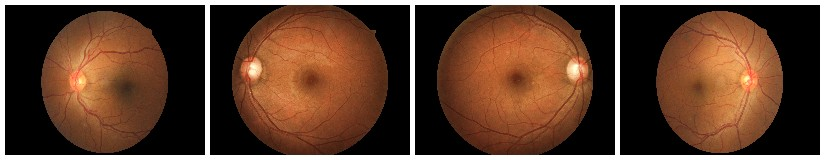

In [0]:
#@title Original { display-mode: "form" }
Image(retina=True, filename=path+'sample_images_unscaled.jpg')

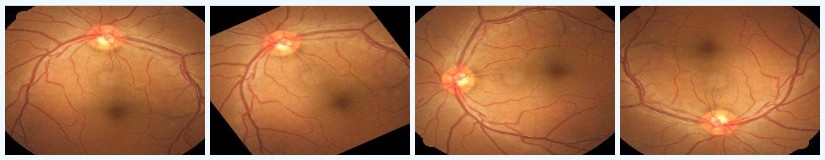

In [0]:
#@title After resizing, rotation, and mirroring
Image(retina=True, filename=path+'17_left_horizontal_white.jpg')

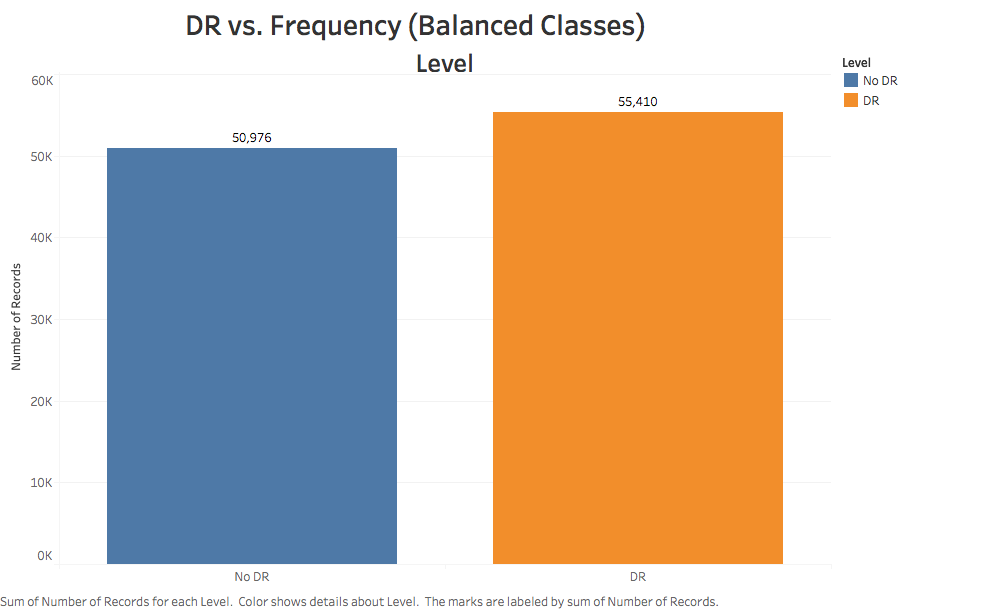

In [3]:
#@title New frequency { display-mode: "form" }
Image(retina=True, filename=path+'DR_vs_frequency_balanced.png')

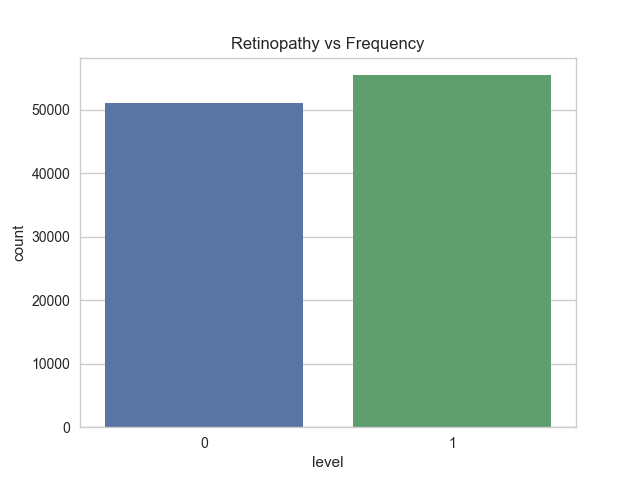

In [21]:
#@title Binary { display-mode: "form" }
Image(retina=True, filename=path2+'Retinopathy_vs_Frequency_Binary_All.png')

# Model

In [6]:
#@title Load { display-mode: "form" }
from keras.utils import plot_model
model = load_model(path + 'model.h5')
plot_model(model, to_file='model.png')

W0717 10:10:04.228624 139915593299840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 10:10:04.288757 139915593299840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 10:10:04.357170 139915593299840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0717 10:10:04.407920 139915593299840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 10:10:04.409077 139915593299840 deprecation_wrap

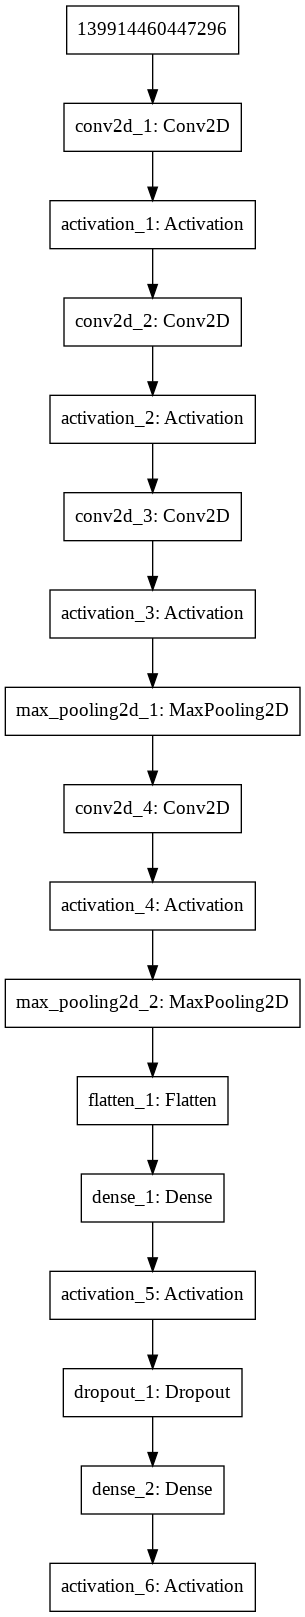

In [7]:
#@title Image
Image(retina=True, filename='model.png')

In [9]:
#@title Summary { display-mode: "form" }
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 63, 32)        6176      
_________________________________________________________________
activation_1 (Activation)    (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        65568     
_________________________________________________________________
activation_2 (Activation)    (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 32)        65568     
_________________________________________________________________
activation_3 (Activation)    (None, 49, 49, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
__________

## Results

In [0]:
result = pd.read_csv(path+'results.csv')

In [0]:
result.sum()

pred    4344
true    5653
dtype: int64

In [18]:
result.shape

(11027, 2)

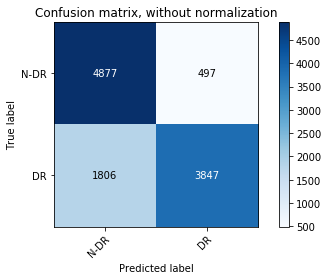

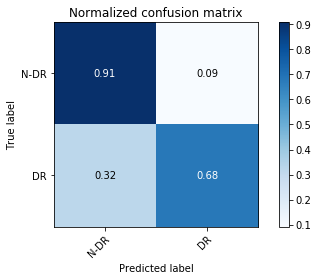

In [13]:
#@title Confusion Matrix { display-mode: "form" }
class_names = np.array(['N-DR', 'DR'])


y_pred = result['pred']

y_test = result['true']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
   
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    
    cm = confusion_matrix(y_true, y_pred)
    
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
    
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
#@title Evaluation { display-mode: "form" }
y_true = y_test
y_scores = y_pred
print('AUC',roc_auc_score(y_true, y_scores))
print('Recall',recall_score(y_true, y_pred))
print('Precision',precision_score(y_true, y_pred))

AUC 0.7940206467433564
Recall 0.6805236157792323
Precision 0.8855893186003683
